In [292]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [293]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import openpyxl

Get the CSV file in and check the header what it looks like

In [294]:
data_dir = 'd:\\Programming\\PowerBI\\FinlandEmissions2023\\Data\\'
main_file = 'Finland_emissions_2023.csv'
print(data_dir + main_file + " " + os.getcwd())
df = pd.read_csv(data_dir + main_file)

df.head(10)

d:\Programming\PowerBI\FinlandEmissions2023\Data\Finland_emissions_2023.csv d:\Programming\PowerBI\FinlandEmissions2023\Python


,Year,Emission category,Greenhouse gas,"Emission, thousand tonnes of CO2 eq. (GWP=AR5)"
0,1990,Emissions without LULUCF,Total,71331
1,1990,Emissions without LULUCF,Carbon dioxide (CO2),57086
2,1990,Emissions without LULUCF,Methane (CH4),8624
3,1990,Emissions without LULUCF,Nitrous oxide (N2O),5567
4,1990,Emissions without LULUCF,F-gases (HFCs+PFCs+SF6),54
5,1990,Emissions without LULUCF,Hydrofluorocarbons (HFCs),0
6,1990,Emissions without LULUCF,Perfluorocarbons (PFCs),0
7,1990,Emissions without LULUCF,Sulfur hexafluoride (SF6),54
8,1990,Emissions with LULUCF,Total,48156
9,1990,Emissions with LULUCF,Carbon dioxide (CO2),30720


Checking the imported types for conversion to more appropriate types

In [295]:
df.dtypes

Year                                              object
Emission category                                 object
Greenhouse gas                                    object
Emission, thousand tonnes of CO2 eq. (GWP=AR5)    object
dtype: object

In [296]:
df.rename(columns={"Emission, thousand tonnes of CO2 eq. (GWP=AR5)": "Emission CO2 equiv"}, inplace=True)

# Do preparations for the data to be able to convert certain columns to numeric
df.loc[df['Year'] == "2023*"] = "2023"
df.loc[df['Emission CO2 equiv'] == "-"] = 0
df.loc[df['Emission CO2 equiv'] == ","] = 0
df.loc[df['Emission CO2 equiv'] == "."] = 0


#df[['Year', 'Emission CO2 equiv']] = df[['Year', 'Emission CO2 equiv']].apply(pd.to_numeric)
#df[['Emission category', 'Greenhouse gas']] = df[['Emission category', 'Greenhouse gas']].apply(str)


In [297]:
df[['Year', 'Emission CO2 equiv']] = df[['Year', 'Emission CO2 equiv']].apply(pd.to_numeric)
# drop rows with all zeros
df = df.loc[(df!=0).any(axis=1)]

# Dig out the main categories of emissions
main_categories = df[df['Greenhouse gas'].str.contains('Total') & df['Emission category'].str.contains(r'^[1-5]\s')]["Emission category"].unique()
main_categories = [x.split(" ", 1)[1] for x in main_categories]
main_categories = pd.DataFrame(["No cat"] + main_categories, columns=["Main category"])
main_categories.set_index(np.arange(0, main_categories.shape[0]), inplace=True)

print("Main categories: ")
print(main_categories)

# Add a column for the main category to reference to the main category table
s1 = pd.Series(df['Emission category'].str.contains(r'^[1-5]\w*\s'))
df["main category"] = df.loc[s1]["Emission category"].apply(lambda x: int(x[0]))
df["main category"] = df["main category"].fillna(0, downcast='int')
#df["main category"] = df["main category"].astype(int)

df_lulucf = df[df['Emission category'].str.contains('LULUCF')]
df = df[~df['Emission category'].str.contains('LULUCF')]

print("LULUCF")
print(df_lulucf.head(10))

main_categories.to_excel(data_dir + "main_categories.xlsx")
df.to_excel(data_dir + "Finland_emissions_2023_cleaned.xlsx")
df_lulucf.to_excel(data_dir + "Finland_emissions_2023_LULUCF.xlsx")


Main categories: 
                                     Main category
0                                           No cat
1                                           Energy
2             Industrial processes and product use
3                                      Agriculture
4  Land use, land-use change and forestry (LULUCF)
5                                 Waste management
LULUCF
   Year         Emission category             Greenhouse gas  \
0  1990  Emissions without LULUCF                      Total   
1  1990  Emissions without LULUCF       Carbon dioxide (CO2)   
2  1990  Emissions without LULUCF              Methane (CH4)   
3  1990  Emissions without LULUCF        Nitrous oxide (N2O)   
4  1990  Emissions without LULUCF    F-gases (HFCs+PFCs+SF6)   
5  1990  Emissions without LULUCF  Hydrofluorocarbons (HFCs)   
6  1990  Emissions without LULUCF    Perfluorocarbons (PFCs)   
7  1990  Emissions without LULUCF  Sulfur hexafluoride (SF6)   
8  1990     Emissions with LULUCF         

C:\Users\jr\AppData\Local\Temp\ipykernel_29240\2042691627.py:18: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df["main category"] = df["main category"].fillna(0, downcast='int')


In [299]:
df_totals = df[df['Greenhouse gas'].str.contains('Total')]
df_totals = df_totals[['Year', 'Emission category', 'Emission CO2 equiv', "main category"]]
df_totals.head(5)

,Year,Emission category,Emission CO2 equiv,main category
16,1990,1 Energy,53420,1
24,1990,1A1 Energy industries,18958,1
32,1990,1A2 Manufacturing industries and construction,13358,1
40,1990,1A2(-1A2gvii) Manufacturing industries and con...,12414,0
48,1990,1A2gvii Off-road vehicles and other machinery ...,944,1


In [300]:
#df_totals_main = df_totals[df_totals['Emission category'].str.contains(r'^[1-5]\s')]
#df_totals_main.loc["Emission category"] = df_totals_main["Emission category"].str.replace(r'^[1-5]\s', '')
#df_totals_main.head(10)

C:\Users\jr\AppData\Local\Temp\ipykernel_29240\614958245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totals_main.loc["Emission category"] = df_totals_main["Emission category"].str.replace(r'^[1-5]\s', '')


,Year,Emission category,Emission CO2 equiv,main category
16,1990.0,1 Energy,53420.0,1.0
224,1990.0,2 Industrial processes and product use,5223.0,2.0
360,1990.0,3 Agriculture,7315.0,3.0
904,1990.0,5 Waste management,5208.0,5.0
960,1991.0,1 Energy,52097.0,1.0
1168,1991.0,2 Industrial processes and product use,4842.0,2.0
1304,1991.0,3 Agriculture,6885.0,3.0
1848,1991.0,5 Waste management,5269.0,5.0
1904,1992.0,1 Energy,51492.0,1.0
2112,1992.0,2 Industrial processes and product use,4567.0,2.0


In [301]:
pofferi = df_totals_main["Emission category"].str.replace(r'^[1-5]\s', '', regex=True)
pofferi["Kofferi"] = df_totals_main["Emission category"]
pofferi.head(10)

16                                    Energy
224     Industrial processes and product use
360                              Agriculture
904                         Waste management
960                                   Energy
1168    Industrial processes and product use
1304                             Agriculture
1848                        Waste management
1904                                  Energy
2112    Industrial processes and product use
Name: Emission category, dtype: object

<Axes: xlabel='Year'>

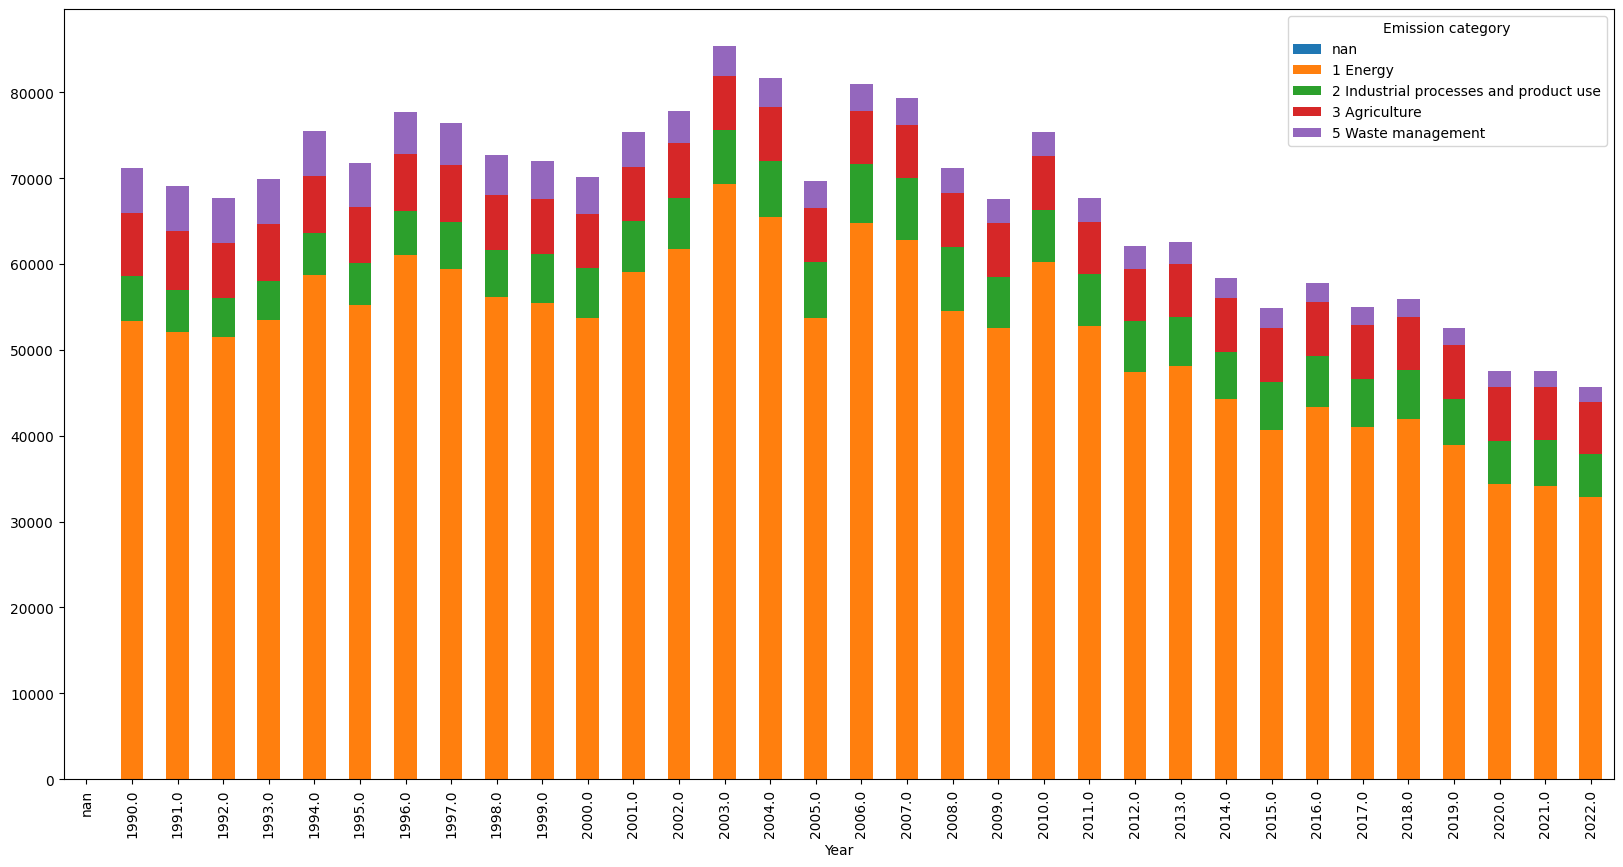

In [302]:
df_totals_main.pivot(index=['Year'], columns=['Emission category'], values='Emission CO2 equiv').plot(kind='bar', stacked=True, figsize=(20,10))

In [303]:
df_totals_main.groupby('Year')['Emission CO2 equiv'].sum()

Year
1990.0    71166.0
1991.0    69093.0
1992.0    67721.0
1993.0    69936.0
1994.0    75506.0
1995.0    71759.0
1996.0    77764.0
1997.0    76424.0
1998.0    72733.0
1999.0    72052.0
2000.0    70114.0
2001.0    75430.0
2002.0    77838.0
2003.0    85424.0
2004.0    81663.0
2005.0    69626.0
2006.0    80997.0
2007.0    79324.0
2008.0    71180.0
2009.0    67559.0
2010.0    75400.0
2011.0    67654.0
2012.0    62114.0
2013.0    62586.0
2014.0    58404.0
2015.0    54905.0
2016.0    57754.0
2017.0    54947.0
2018.0    55879.0
2019.0    52591.0
2020.0    47587.0
2021.0    47546.0
2022.0    45649.0
Name: Emission CO2 equiv, dtype: float64

In [304]:
df_totals_main.loc[df_totals_main['Year'] == 2022]

,Year,Emission category,Emission CO2 equiv,main category
30224,2022.0,1 Energy,32868.0,1.0
30432,2022.0,2 Industrial processes and product use,4979.0,2.0
30568,2022.0,3 Agriculture,6075.0,3.0
31112,2022.0,5 Waste management,1727.0,5.0


In [305]:
df_lulucf.to_excel(data_dir + 'lulucf.xlsx', index=False)
df_totals_main.to_excel(data_dir + 'totals_main.xlsx', index=False)